In [1]:
import pandas as pd
import bamboolib as bam

In [2]:
df = pd.read_pickle('data/restaurant/processed1.pkl')

In [3]:
df['date'] = df['Order Date'].dt.date
df['dayyear'] = df['Order Date'].dt.day_of_year
df['month'] = df['Order Date'].dt.month
df['day'] = df['Order Date'].dt.day
df['Total Price'] = df['Quantity']*df['Product Price']
df['year'] = df['Order Date'].dt.year

<AxesSubplot: xlabel='Order Date'>

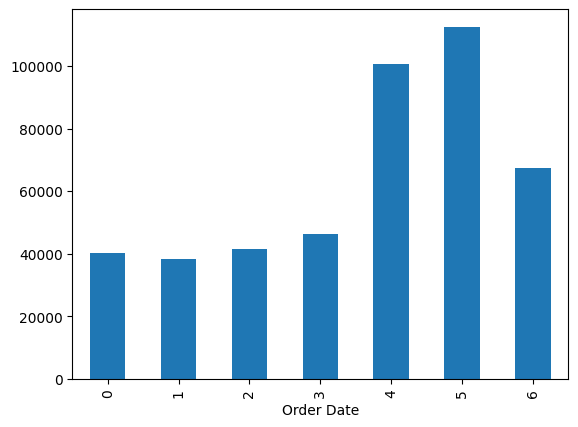

In [4]:
df.groupby(pd.to_datetime(df['Order Date']).dt.day_of_week)['Total Price'].sum().plot(kind="bar")

In [5]:
df[df['Order Number'] == 1212] # Different product price for the same dish in the same order. Might only happen in 2015 data.

       Order Number          Order Date               Item Name  Quantity  \
39142          1212 2015-09-29 15:20:00           Chicken Tikka         3   
42118          1212 2015-09-29 15:20:00  Tandoori Chicken (1/4)         1   
54026          1212 2015-09-29 15:20:00           Chicken Tikka         1   

       Product Price  Total products  Weekday  cloud_cover  sunshine  \
39142           3.95               3        1          1.0       8.9   
42118           4.95               3        1          1.0       8.9   
54026           7.95               3        1          1.0       8.9   

       max_temp  mean_temp  min_temp  precipitation  snow_depth        date  \
39142      18.7       14.8      10.4            0.0         0.0  2015-09-29   
42118      18.7       14.8      10.4            0.0         0.0  2015-09-29   
54026      18.7       14.8      10.4            0.0         0.0  2015-09-29   

       dayyear  month  day  Total Price  year  
39142      272      9   29        11.

In [6]:
df2 = pd.read_pickle('data/restaurant/processed2.pkl')

# Weather

In [11]:
tmp = df.groupby('date').agg(price_sum = ('Total Price', 'sum'), quantity = ('Quantity', 'sum'), max_temp = ('max_temp', 'max'), clouds = ('cloud_cover', 'max'), sun = ('sunshine', 'max'), snow = ('snow_depth', 'max'), rain = ('precipitation', 'max'))

In [12]:
import pandas as pd; import numpy as np
tmp = tmp.reset_index()
tmp

            price_sum  quantity  max_temp  clouds   sun  snow  rain
date                                                               
2015-09-01       3.95         1      19.0     7.0   3.1   0.0   0.2
2015-09-08      11.85         3      19.7     7.0   1.4   0.0   0.0
2015-09-09      23.70         6      21.2     6.0   2.1   0.0   0.4
2015-09-29      45.55         9      18.7     1.0   8.9   0.0   0.0
2015-09-30     104.00        20      18.8     0.0  10.7   0.0   0.0
...               ...       ...       ...     ...   ...   ...   ...
2019-07-30     461.15       100      24.9     6.0   1.5   0.0   3.8
2019-07-31     422.80        87      26.0     7.0   4.2   0.0   0.0
2019-08-01     325.35        65      25.8     6.0   5.7   0.0   0.0
2019-08-02     598.55       132      24.7     4.0   6.6   0.0   0.0
2019-08-03     720.65       162      27.4     4.0   3.0   0.0   0.0

[1207 rows x 7 columns]